In [6]:
import qiskit
print(qiskit.__version__)
print("Hello")

0.10.0
Hello


In [7]:
from qiskit import QuantumCircuit

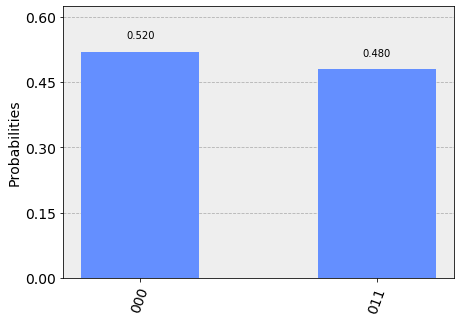

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# Choose a real device to simulate
#IBMQ.load_account()
#provider = IBMQ.get_provider(group='open')
#device = provider.get_backend('ibmq_16_melbourne')
#properties = device.properties()
#coupling_map = device.configuration().coupling_map

# Generate an Aer noise model for device
#noise_model = noise.device.basic_device_noise_model(properties)
#basis_gates = noise_model.basis_gates

# Generate a quantum circuit
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.h(1)
qc.cx([0,1],2)
qc.measure([0, 0,0], [0, 1,0])
qc.draw(output="mpl")
# Perform noisy simulation
backend = BasicAer.get_backend('qasm_simulator')
shots = 100
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [114]:
import numpy as np
from qiskit import *

q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q,c)
circuit.h([q[0],q[1]])
#circuit.h(q[1])
circuit.ccx(q[0],q[1],q[2])
circuit.cx(q[2],q[3])
circuit.measure(q,c)

In [115]:
circuit.draw()

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 10, 23, 21, 12, 14, 700836), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='c3a84122-e402-4703-9fe1-2630e4d79d5e', metadata={'max_memory_mb': 4033, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000127}, qobj_id='7e1cb912-05c5-42f8-916e-b5d6d4b02a51', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=1), statevector=[(1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]), header=Obj(clbit_labels=[['c12', 0], ['c12', 1], ['c12', 2], ['c12', 3]], creg_sizes=[['c12', 4]], memory_slots=4, n_qubits=4, name='circuit132', qreg_sizes=[['q12', 4]], qubit_labels=[['q12', 0], ['q12', 1], ['q12', 2], ['q12', 3]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=2614760460, shots=1, status='DONE', success=True, time_taken=6.18e-05)], status='COMPLETED', success=True, time_taken=

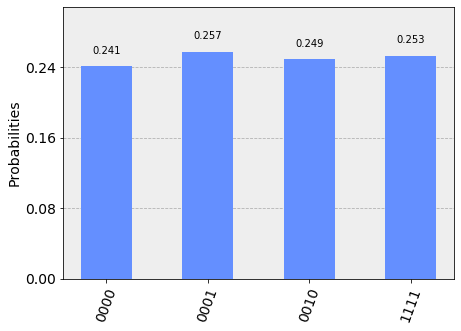

In [116]:
simulator = Aer.get_backend('qasm_simulator')
backend = Aer.get_backend('statevector_simulator')

job = execute(circuit, simulator, shots=1000)
job1 = execute(circuit, backend, shots=1000)

result = job.result()
result1 = job1.result()

print(result1)
counts = result.get_counts(circuit)
print("\nTotal count are:",counts)
plot_histogram(counts)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


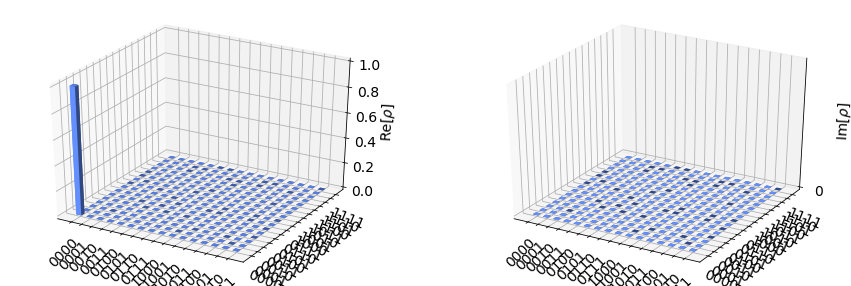

In [117]:
outputstate = result1.get_statevector(circuit, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [36]:
def phase_oracle(circuit, register):
    circuit.cz(qr[2],qr[0])
    circuit.cz(qr[2],qr[1])

In [38]:
def n_controlled_Z(circuit, controls, target):
    """Implement a Z gate with multiple controls"""
    if (len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 controls is not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)

In [39]:
def inversion_about_average(circuit, register, n, barriers):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    
    if barriers:
        circuit.barrier()
    
    n_controlled_Z(circuit, [register[j] for j in range(n-1)], register[n-1])
    
    if barriers:
        circuit.barrier()
    
    circuit.x(register)
    circuit.h(register)

In [40]:
barriers = True

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

if barriers:
    groverCircuit.barrier()

phase_oracle(groverCircuit, qr)

if barriers:
    groverCircuit.barrier()

inversion_about_average(groverCircuit, qr, 3, barriers)

if barriers:
    groverCircuit.barrier()

groverCircuit.measure(qr,cr)

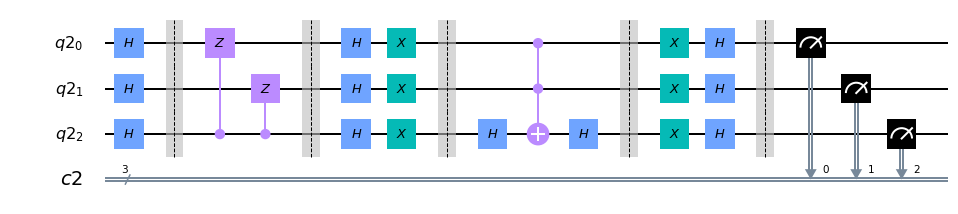

In [41]:
groverCircuit.draw(output="mpl")

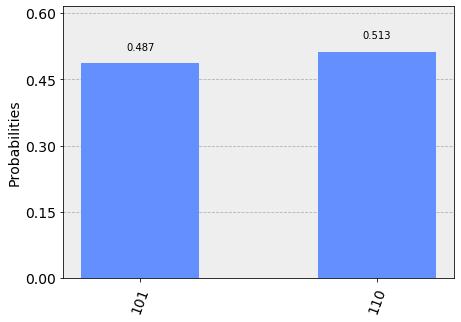

In [42]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)